# **PORTFOLIO ANALYSIS - Python for Financial Analysis Capstone Project**

## **Project Instructions**
The purpose of this capstone is to practice accessing and downloading financial data, calculating financial statistics to understand the individual performance of an asset and how groups of assets are related, and how to allocate investments across assets for optimal performance.

## **Investment Criteria**
The portfolio below is a combination of my own research and suggestions by professional asset managers who manage large portfolios. I have picked seven stocks based on the following criteria:

- Technologically enabled
- Going to transform the the world as we know it
- Industries that are going to see incredible growth in next 5-10yrs:
    - Robotics
    - Artificial intelligence
    - Energy storage
    - Blockchain technology
    - Multiomic sequencing (lifescience) - is a research approach that integrates data from multiple "omics" levels (like genomics, transcriptomics, proteomics, etc.) to provide a more comprehensive understanding of biological systems and disease mechanisms. It reveals complex interactions and relationships within a cell or organism. 

It is going to be a 5-10 year strategy that is for more risk-tolerant investor. I am expecting to see large standard deviations on some of them. We are at the gusp of the world changing drastically as a result of Gen AI becoming mainstream. The new technologies are developing within matter of weeks, not matter of years, therefore I felt it would make sense to consder the stocks listed below. Further reasoning and descriptions are in the attached PowerPoint document.

As a diversification strategy to balance the risk I would recomment investing to index-linked securties, ETFs and Bonds.

## **Our Stocks**

Please read the Powerpoint for decriptions and reasons.

- NVIDIA(NASDAQ: NVDA)
- Tesla Inc (NASDAQ: TSLA)
- Archer Aviation Inc (NYSE: ACHR)
- Palantir Technologies Inc (NASDAQ: PLTR)
- AES Corp (NYSE: AES)
- CRISPR Therapeutics AG (NASDAQ: CRSP)
- Vertex Pharmaceuticals Inc  (NASDAQ: VRTX)


**Disclaimer:** Any information in this file and accompanying Powerpoint does not constitute investment advice. This is a school project. Any investment decisions dervied from reading this file are solely at your own risk.

**Date: 19 June 2025**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf

### **Define Assets and Download Data**

In [2]:
symbols = ['NVDA', 'TSLA', 'ACHR', 'PLTR', 'AES', 'CRSP', 'VRTX']
start = datetime(2023, 1, 1)
stocks = yf.download(symbols, start=start, auto_adjust = True) 
#no end date so it will automatically download data up to the most recent available trading day
#auto_adjust = True means prices returned are adjusted for stock splits, dividends and new stock offerings
#to allow more accurate historical picture of stock's performance

closing_price = stocks['Close']
closing_price.head()
#we are going to use Closing Price, which is really the Adj Closing price, for our analyis beyond this point.

[*********************100%***********************]  7 of 7 completed


Ticker,ACHR,AES,CRSP,NVDA,PLTR,TSLA,VRTX
Date,,,,,,,
2023-01-03,1.93,25.282717,41.000000,14.302286,6.39,108.099998,286.019989
2023-01-04,2.11,24.536196,45.000000,14.735900,6.58,113.639999,286.829987
2023-01-05,2.15,23.268015,47.450001,14.252333,6.32,110.339996,287.890015
2023-01-06,2.30,23.771690,47.209999,14.845803,6.40,113.059998,290.209991
2023-01-09,2.37,24.509216,46.680000,15.614120,6.50,119.769997,283.230011


In [3]:
#set global colours to be used throughout the project
stock_colors = {
    'ACHR': '#1f77b4',  # blue
    'TSLA': '#ff7f0e',  # orange
    'NVDA': '#2ca02c',  # green
    'PLTR': '#d62728',  # red
    'AES': '#9467bd',   # purple
    'CRSP': '#8c564b',  # brown
    'VRTX': '#e377c2'   # pink
}
palette = sns.color_palette([stock_colors[s] for s in symbols])
sns.set_palette(palette)  # Applies to Seaborn plots only

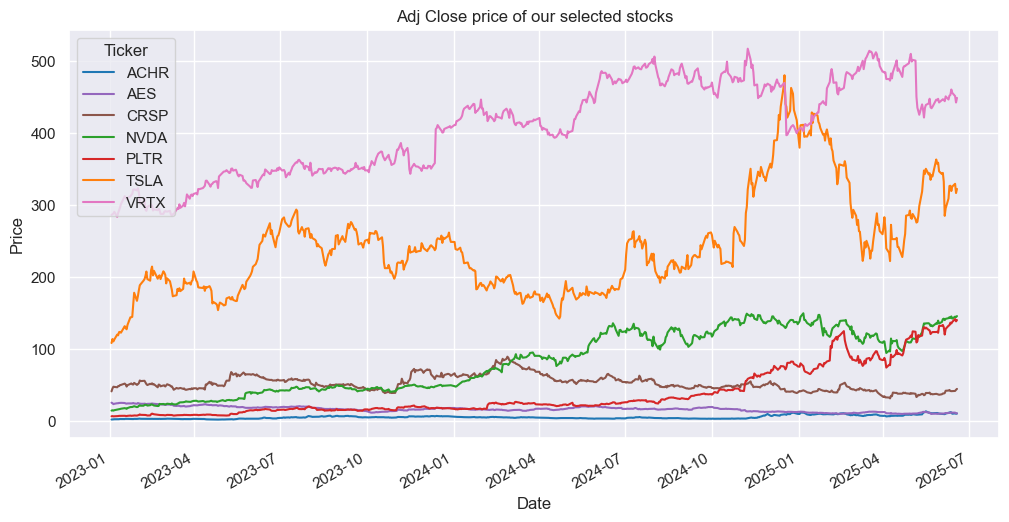

In [4]:
#Plot the closing price of the seven selected stocks Jan 2023 to Jun 2025
closing_price.plot(figsize = (12, 6), color = stock_colors)
plt.ylabel('Price')
plt.title('Adj Close price of our selected stocks')
plt.show()

Tesla has dopped massively due to the recent drama between Trump and Musk.
Palantir and Nvidia are showing consistent upward trend.

In [5]:
#Calculate daily returns for each stock
daily_returns = closing_price.pct_change()
daily_returns.head()

Ticker,ACHR,AES,CRSP,NVDA,PLTR,TSLA,VRTX
Date,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.093264,-0.029527,0.097561,0.030318,0.029734,0.051249,0.002832
2023-01-05,0.018957,-0.051686,0.054444,-0.032816,-0.039514,-0.029039,0.003696
2023-01-06,0.069767,0.021647,-0.005058,0.041640,0.012658,0.024651,0.008059
2023-01-09,0.030435,0.031025,-0.011226,0.051753,0.015625,0.059349,-0.024051


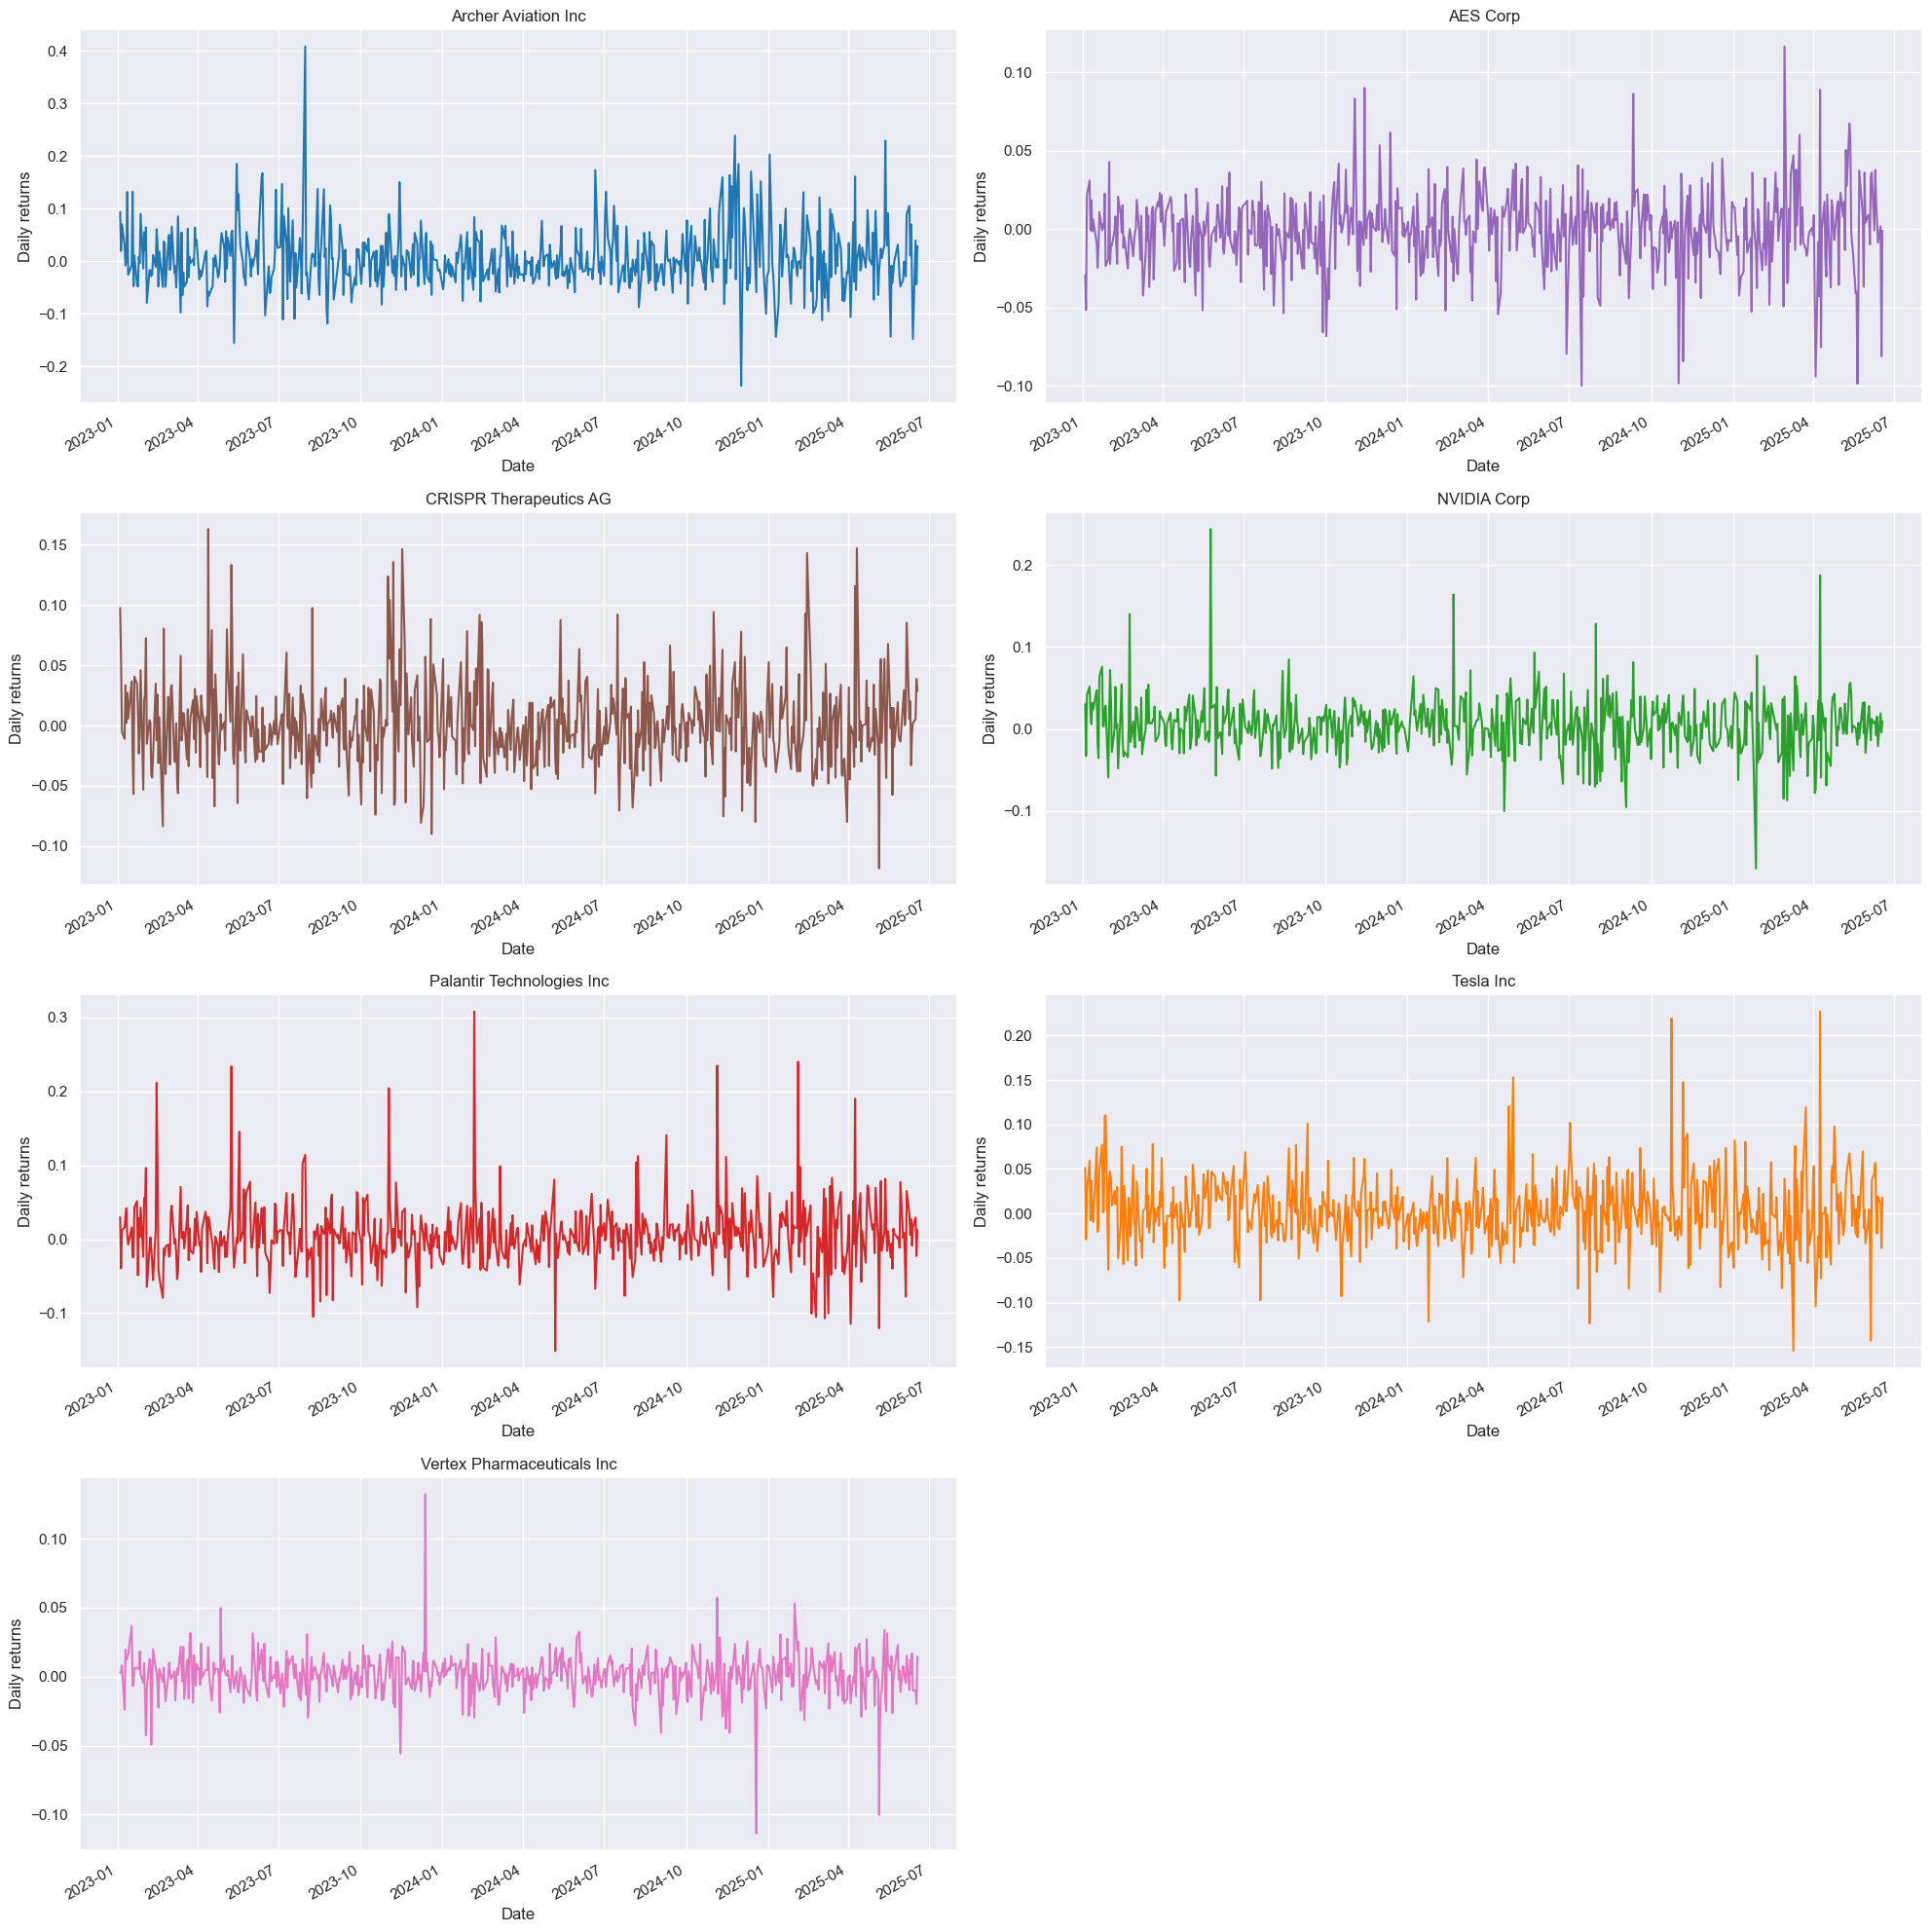

In [6]:
#Plot daily returns for each stock
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
daily_returns['ACHR'].plot(color = stock_colors['ACHR'])
plt.ylabel('Daily returns')
plt.title('Archer Aviation Inc')

plt.subplot(4, 2, 2)
daily_returns['AES'].plot(color = stock_colors['AES'])
plt.ylabel('Daily returns')
plt.title('AES Corp')

plt.subplot(4, 2, 3)
daily_returns['CRSP'].plot(color = stock_colors['CRSP'])
plt.ylabel('Daily returns')
plt.title('CRISPR Therapeutics AG')

plt.subplot(4, 2, 4)
daily_returns['NVDA'].plot(color = stock_colors['NVDA'])
plt.ylabel('Daily returns')
plt.title('NVIDIA Corp')

plt.subplot(4, 2, 5)
daily_returns['PLTR'].plot(color = stock_colors['PLTR'])
plt.ylabel('Daily returns')
plt.title('Palantir Technologies Inc')

plt.subplot(4, 2, 6)
daily_returns['TSLA'].plot(color = stock_colors['TSLA'])
plt.ylabel('Daily returns')
plt.title('Tesla Inc')

plt.subplot(4, 2, 7)
daily_returns['VRTX'].plot(color = stock_colors['VRTX'])
plt.ylabel('Daily returns')
plt.title('Vertex Pharmaceuticals Inc')

plt.tight_layout()
plt.show()

In [7]:
#Calculate average returns for each stock
average_returns = daily_returns.mean()
average_returns

Ticker
ACHR    0.004334
AES    -0.001111
CRSP    0.000779
NVDA    0.004326
PLTR    0.005965
TSLA    0.002537
VRTX    0.000860
dtype: float64

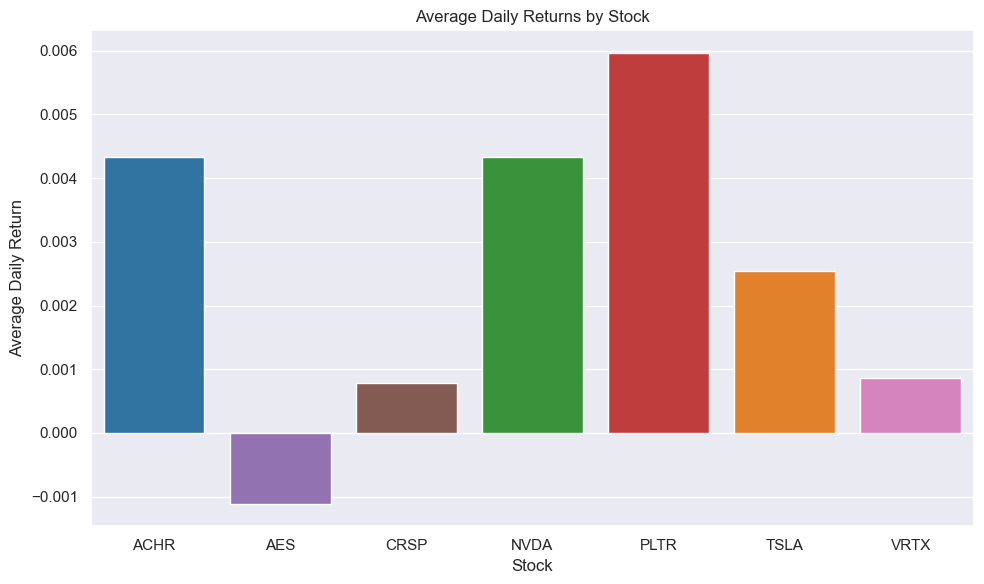

In [8]:
#convert to Dataframe
avg_returns_df = average_returns.reset_index()
avg_returns_df.columns = ['Stock', 'Return']

#plot a bar chart with average returns
plt.figure(figsize=(10,6))
sns.barplot(x='Stock', y='Return', hue = 'Stock', data=avg_returns_df, palette=stock_colors)
plt.title('Average Daily Returns by Stock')
plt.ylabel('Average Daily Return')
plt.xlabel('Stock')
plt.tight_layout()
plt.show()

In [9]:
#Calcualte variance of the daily returns
variance = daily_returns.var()
variance

Ticker
ACHR    0.003380
AES     0.000619
CRSP    0.001323
NVDA    0.001128
PLTR    0.001967
TSLA    0.001550
VRTX    0.000259
dtype: float64

In [10]:
#Calculate standard deviation of the daily returns
st_dev = daily_returns.std()
st_dev

Ticker
ACHR    0.058136
AES     0.024889
CRSP    0.036379
NVDA    0.033590
PLTR    0.044355
TSLA    0.039373
VRTX    0.016092
dtype: float64

Standard deviation measures the volatility of a stock's returns relative to its average. A higher standard deviation indicates greater price fluctuations and higher risk, while a lower standard deviation suggests more stable prices and lower risk. 

In [11]:
#Prep the data in order to create a side by side bar chart comparing returns and standard deviation. 
combined_df = pd.DataFrame({
    'Stock': average_returns.index,
    'Average Return': average_returns.values,
    'Standard Deviation': st_dev.values
})
combined_df

,Stock,Average Return,Standard Deviation
0,ACHR,0.004334,0.058136
1,AES,-0.001111,0.024889
2,CRSP,0.000779,0.036379
3,NVDA,0.004326,0.033590
4,PLTR,0.005965,0.044355
5,TSLA,0.002537,0.039373
6,VRTX,0.000860,0.016092


In [12]:
#Convert to long format for Seaborn
long_df = pd.melt(combined_df, id_vars='Stock',
                  value_vars=['Average Return', 'Standard Deviation'],
                  var_name='Metric', value_name='Value')

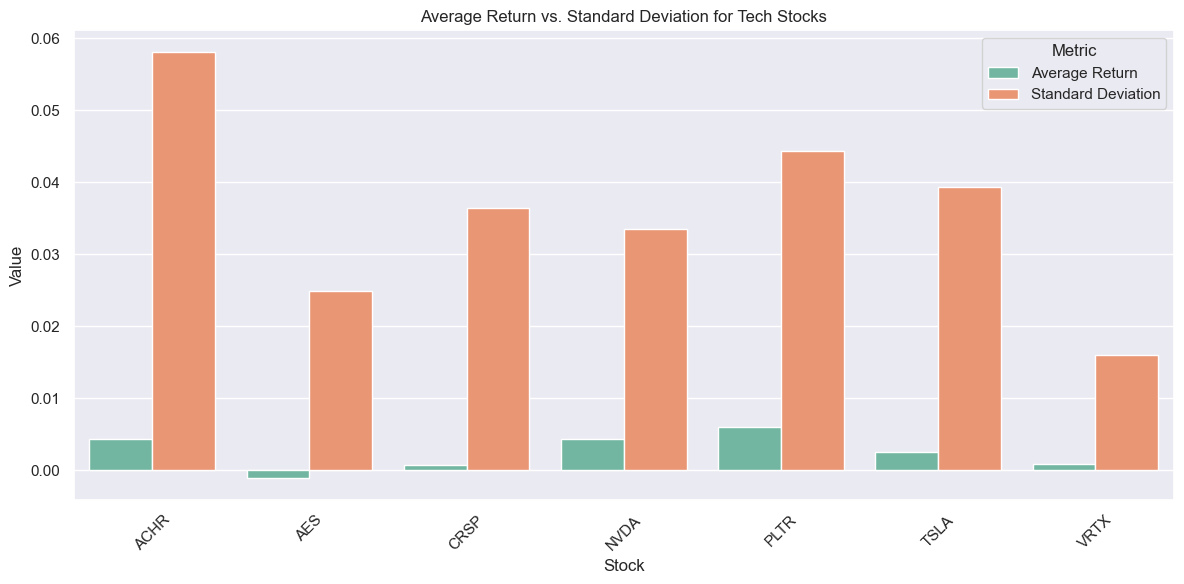

In [13]:
#Plot the bar charts
plt.figure(figsize=(12, 6))

sns.barplot(
    data=long_df,
    x='Stock',
    y='Value',
    hue='Metric',  # Creates side-by-side bars for each metric
    palette='Set2' 
)

plt.title('Average Return vs. Standard Deviation for Tech Stocks')
plt.ylabel('Value')
plt.xlabel('Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Average Return vs Std Dev')
plt.show()

The riskiest asset by far is Archer Aviation Inc which makes sense since they are developing brand new technology -  flying cars, that are effectively drones but can take 4 passengers and a pilot. It's all very exciting but still probably 7-10 years away in the future. It's for a risk-tolerant investor.
AES seems to be a non-starter based on our analysis, they show negative returns. The reason why they are in the portfolio is the recent news in June 2025 they completed a first phase of largest solar-plus storage project in the US.
Palantir shows high volatility, but recently they have really excelled in AI and Data analysis technology, so we are expecting great things here.
Tesla has some amazing inventions and a strong pipeline, Elon Musk being a bit of a divisive figure will mean this stock is going to always be volatile. Recent blowout with Trump has not helped. We, however, believe in his hyper-focus and obsession, he has overcome some of the hardest challenges known to our era, therefore, we feel it's worth investing into. 
CRISPR Therapeutics is an innovative pharmaceutical company, they require huge capital for R&D, hence the high volatility. Perhaps a long-term investment for more risk-tolerant investor.

In [14]:
#Create covariance matrix. 
#Covariance measures how the returns of different stocks move in relation to each other. 
covariance = daily_returns.cov()
covariance

Ticker,ACHR,AES,CRSP,NVDA,PLTR,TSLA,VRTX
Ticker,,,,,,,
ACHR,0.003380,0.000357,0.000589,0.000474,0.000941,0.000760,0.000080
AES,0.000357,0.000619,0.000196,0.000127,0.000201,0.000183,0.000079
CRSP,0.000589,0.000196,0.001323,0.000293,0.000545,0.000442,0.000139
NVDA,0.000474,0.000127,0.000293,0.001128,0.000588,0.000515,0.000049
PLTR,0.000941,0.000201,0.000545,0.000588,0.001967,0.000756,0.000085
TSLA,0.000760,0.000183,0.000442,0.000515,0.000756,0.001550,0.000091
VRTX,0.000080,0.000079,0.000139,0.000049,0.000085,0.000091,0.000259


There is a weak positive covariance between the stocks in this portfolio which means they are most likely to move in the same direction but at different speeds.

In [15]:
#create correlation matrix. Correlation measures (linear) relationship and the degree to which two securities move in relation to each other.
correlation = daily_returns.corr()
correlation

Ticker,ACHR,AES,CRSP,NVDA,PLTR,TSLA,VRTX
Ticker,,,,,,,
ACHR,1.000000,0.246638,0.278352,0.242692,0.365012,0.331988,0.085525
AES,0.246638,1.000000,0.216877,0.151750,0.182436,0.186884,0.198252
CRSP,0.278352,0.216877,1.000000,0.239804,0.337784,0.308310,0.238173
NVDA,0.242692,0.151750,0.239804,1.000000,0.394801,0.389774,0.089775
PLTR,0.365012,0.182436,0.337784,0.394801,1.000000,0.433042,0.119109
TSLA,0.331988,0.186884,0.308310,0.389774,0.433042,1.000000,0.143963
VRTX,0.085525,0.198252,0.238173,0.089775,0.119109,0.143963,1.000000


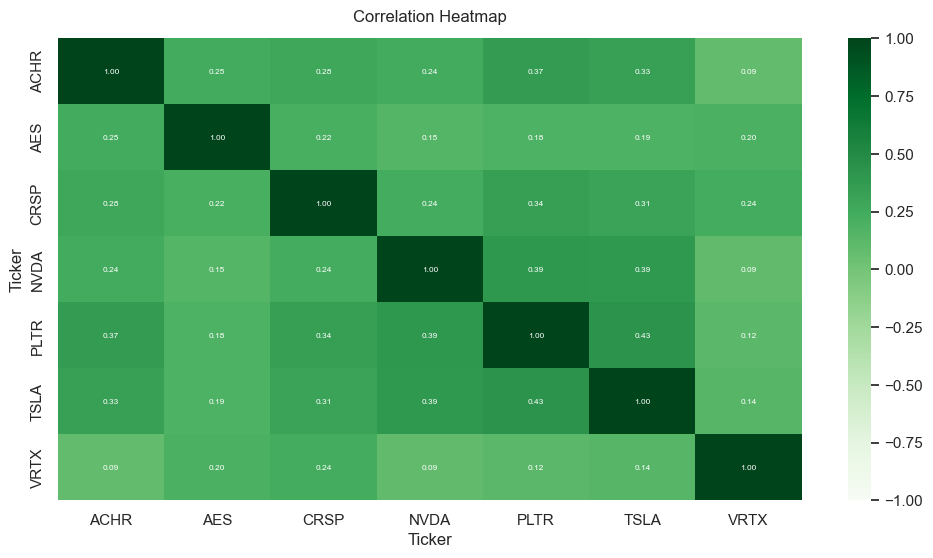

<Figure size 640x480 with 0 Axes>

In [16]:
# Function that produces a heat map of correlations between stocks
# Inputs: First make correlation dataframe from returns dataframe. Input that object to function
# Note that fmt='.2f' rounds values to 2 decimals. Increase that to get more decimals.

def corr_heat_map(corr_df, save_as):
    plt.figure(figsize = (12,6))
    corr_returns_heatmap = sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, annot=True, fmt='.2f', cmap='Greens', annot_kws={"size": 6})
    corr_returns_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
    #uncomment to save figure if required
    #plt.savefig('What Does The Correlation Heat Map Look Like.png', dpi = 300, bbox_inches = 'tight')

    # save chart file to folder
    plt.savefig(save_as, bbox_inches='tight')
    
    # show graphic
    plt.show()

    # clear graphic to avoid overlap with next plots
    plt.clf()
    
# Produce correlation heatmap using corr_heat_map function
corr_heat_map(correlation, '8 - correlation heat map, all stocks.png')

Most stocks in this portfolio are weakly positively correlated. This means that when one stock increases, the other stock tends to increase slightly as well, but the relationship is not strong. 
The strongest relationship in this portfolio is between Tesla and Palantir at 0.433.
The weakest realtionship is between Archer Aviation and Vertex Pharmaceuticals at 0.0855.
A correlation coefficient of 0 suggests there is no linear relationship between the stocks. They move independently of each other. 

## **Portfolio optimisation for risk and return**

### **Define required functions**

The functions `return_portfolios` and `optimal_portfolios` are defined here. They are required for next steps.

- `return_portolios` generates 5,000 randomly weighted portfolios from the our selected stocks to find the optimal portfolio with lowest volatility 
- `optimal_portfolio` returns the portfolio weights that are on the efficient frontier (optimized weights) along with the expected returns and risks of these portfolios.

The `optimal_portfolio()` function has one parameter: returns — the returns for all assets over a specified timeframe.
The `optimal_portfolio()` function returns:
- weights — the weights for each asset in the portfolio
- returns — the expected returns of each portfolio
- risks — the risk of each portfolio, measured as standard deviation


In [17]:
#This function simulates 5000 combinations of our selected stocks to find the best weighted average for each.
#It returns a Dataframe with: 1. their expected return 2. their volatility (risk) 3. the weight of each stock in every portfolio
#It's a method used for building optimised portfolio for minimum volatility
#expected_returns - Panda's series of each stock's average return
#cov_matrix - covariance matrix of the stock returns

def return_portfolios(expected_returns, cov_matrix):
    #Ensure reproducibility to get the same "random" results every time
  np.random.seed(1)
  port_returns = []
  port_volatility = []
  stock_weights = []
    
  selected = (expected_returns.axes)[0]
    
  num_assets = len(selected) 
  num_portfolios = 5000

    #run 5000 simulations of our selected portfolio with different weights and enure they add up to 100%
    #returns: weighted average of expected returns
    #volatility: portfolio risk using matrix algebra
  for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, expected_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

      #build Dataframe and add each stock's weight to the dictionary
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
  for counter,symbol in enumerate(selected):
    portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
  df = pd.DataFrame(portfolio)
    
    #reorder columns
  column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
  df = df[column_order]
   
  return df


In [18]:
#Compute the Optimal Portfolio on the Efficient Frontier using Mean-Variance Optimization 
#(a foundational concept in Modern Portfolio Theory, MPT), solved via Quadratic Programming with cvxopt.

def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks


In [19]:
#simulate 5000 random portfolios
random_portfolios = return_portfolios(average_returns, covariance)
random_portfolios.head()

,Returns,Volatility,ACHR Weight,AES Weight,CRSP Weight,NVDA Weight,PLTR Weight,TSLA Weight,VRTX Weight
0,0.001922,0.023094,0.223587,0.386202,0.000061,0.162096,0.078683,0.049507,0.099863
1,0.002494,0.020836,0.099639,0.114404,0.155362,0.120871,0.197576,0.058952,0.253196
2,0.001473,0.016947,0.009736,0.238339,0.148344,0.198604,0.049905,0.070421,0.284650
3,0.003557,0.028760,0.250255,0.081007,0.178936,0.226510,0.231218,0.021980,0.010094
4,0.002485,0.021378,0.045284,0.234149,0.026223,0.112285,0.255413,0.142164,0.184483


In [20]:
#calculate the optimal portfolio
weights, returns, risks = optimal_portfolio(daily_returns[1:])

     pcost       dcost       gap    pres   dres
 0: -2.5382e-03 -1.0059e+00  1e+00  1e-16  3e+00
 1: -2.5485e-03 -1.5917e-02  1e-02  7e-17  4e-02
 2: -3.1764e-03 -6.0082e-03  3e-03  6e-17  8e-03
 3: -5.3305e-03 -6.9587e-03  2e-03  8e-16  2e-03
 4: -5.8389e-03 -5.8771e-03  4e-05  2e-16  5e-05
 5: -5.8659e-03 -5.8663e-03  4e-07  2e-16  5e-07
 6: -5.8662e-03 -5.8662e-03  4e-09  2e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5349e-03 -1.0059e+00  1e+00  2e-16  3e+00
 1: -2.5452e-03 -1.5911e-02  1e-02  8e-17  4e-02
 2: -3.1719e-03 -6.0014e-03  3e-03  8e-17  8e-03
 3: -5.3265e-03 -6.9468e-03  2e-03  9e-16  2e-03
 4: -5.8269e-03 -5.8651e-03  4e-05  3e-16  5e-05
 5: -5.8539e-03 -5.8543e-03  4e-07  2e-16  5e-07
 6: -5.8542e-03 -5.8542e-03  4e-09  3e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5313e-03 -1.0059e+00  1e+00  5e-16  3e+00
 1: -2.5416e-03 -1.5905e-02  1e-02  5e-17  4e-02
 2: -3.1668e-03 -5.9937e

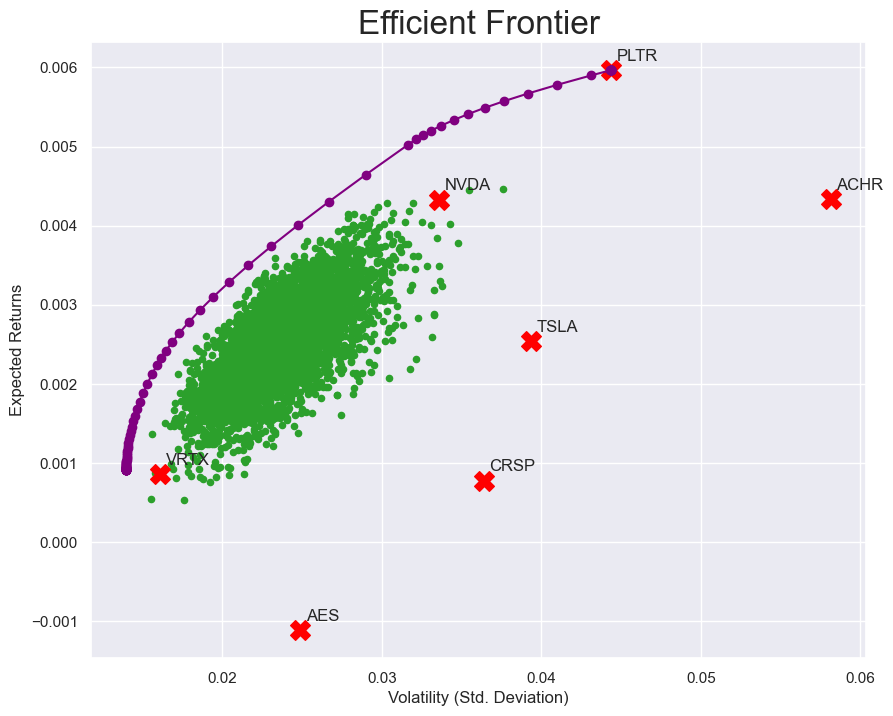

In [21]:
#plot the scatter graph of 5000 portfolios
random_portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8)) 

#plot efficient frontier
plt.plot(risks, returns, color='purple', marker='o', linestyle='-')
single_asset_std=np.sqrt(np.diagonal(covariance))
plt.scatter(single_asset_std,average_returns,marker='X',color='red',s=200)
for i, txt in enumerate(daily_returns.keys()):
    plt.annotate(txt, (single_asset_std[i], average_returns.iloc[i]), size=12, xytext=(4,7), ha='left', textcoords='offset points')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier', fontsize=24)
plt.savefig('Efficient Frontier')
plt.show()

In [22]:
#find the lowest and highest volatility out of 5000 simulations
min_volatility = random_portfolios.Volatility.min()
max_volatility = random_portfolios.Volatility.max()
print(min_volatility,max_volatility)

0.015521158523825204 0.037595185196611945


In [23]:
#find the lowest and highest returns out of 5000 simulations
min_returns = random_portfolios.Returns.min()
max_returns = random_portfolios.Returns.max()
print(min_returns,max_returns)

0.0005333749013387416 0.004459402755051809


### *Minimum Risk*

In [24]:
portfolio_min_volatility = random_portfolios[
    (random_portfolios['Volatility'] == min_volatility) &
    (random_portfolios['Returns'] > min_returns)
]
portfolio_min_volatility

,Returns,Volatility,ACHR Weight,AES Weight,CRSP Weight,NVDA Weight,PLTR Weight,TSLA Weight,VRTX Weight
566,0.000544,0.015521,0.000418,0.414519,0.012399,0.095038,0.005928,0.084079,0.387619


### *Maximum Return*

In [25]:
portfolio_max_return = random_portfolios[
                            (random_portfolios['Volatility'] > min_volatility) &
                            (random_portfolios['Returns'] == max_returns)]
portfolio_max_return

,Returns,Volatility,ACHR Weight,AES Weight,CRSP Weight,NVDA Weight,PLTR Weight,TSLA Weight,VRTX Weight
3498,0.004459,0.037595,0.451393,0.008666,0.050077,0.060673,0.337031,0.072613,0.019547


### *Optimal Risk-Return Ratio Portfolio*

This typically means the portfolio with the highest Sharpe Ratio, where

- Return = portfolio’s expected return
- Volatility = standard deviation (risk)
- r = risk-free rate (e.g., 0.0 for simplicity)

In [26]:
risk_free_rate = 0.0 

# Calculate Sharpe Ratio for all portfolios
random_portfolios['Sharpe Ratio'] = (random_portfolios['Returns'] - risk_free_rate) / random_portfolios['Volatility']

# Get the row with the highest Sharpe Ratio
optimal_portfolio = random_portfolios.loc[[random_portfolios['Sharpe Ratio'].idxmax()]]

#Download to CSV
optimal_portfolio.to_csv('optimal_portfolio.csv', index=False)

# Display it to four decimal points
optimal_portfolio.round(4)

,Returns,Volatility,ACHR Weight,AES Weight,CRSP Weight,NVDA Weight,PLTR Weight,TSLA Weight,VRTX Weight,Sharpe Ratio
3356,0.0036,0.0233,0.0195,0.0169,0.0526,0.3462,0.2783,0.0494,0.2371,0.1544


### *Middle-Range Portfolio*

Portfolio with return and volatility closest to the median.

In [27]:
#Calculate median return and volatility
median_return = random_portfolios['Returns'].median()
median_volatility = random_portfolios['Volatility'].median()

# Find portfolio closest to median return and volatility
random_portfolios['distance_to_median'] = (
    (random_portfolios['Returns'] - median_return)**2 +
    (random_portfolios['Volatility'] - median_volatility)**2
).pow(0.5)

middle_portfolio = random_portfolios.loc[[random_portfolios['distance_to_median'].idxmin()]]
middle_portfolio.round(4)

,Returns,Volatility,ACHR Weight,AES Weight,CRSP Weight,NVDA Weight,PLTR Weight,TSLA Weight,VRTX Weight,Sharpe Ratio,distance_to_median
4238,0.0025,0.0235,0.221,0.0323,0.1895,0.1512,0.0512,0.1225,0.2323,0.1079,0.0
